# Dataset Introduction

This dataset belongs to a Hackathon organized by "Univ.AI". The dataset contains information about histoic customer behaviors observed by an organization, including income, age, experience, profession, married, house ownership, car ownership, risk flag, state, city, current house years and current job years. There are 13 variables in this dataset, whose length is 252k.

# Problem Statement

An organization wants to predict who possible defaulters are for the consumer loans product. They have data about historic customer behavior based on what they have observed. Hence when they acquire new customers they want to predict who is riskier and who is not. In this project, I am going to build and optimize some models from both supervised and unsupervised learning perspectives in order to achieve better predictive performance.

## Supervised Learning Outline

As mentioned before, our goal is to build a model to predict whether a customer is a riskier or not. This kind of prediction makes great sense in terms of new customer detection and risk assessment of existing users. Such algorithm design is part of responsibility of risk management, which is an extremely important part in most business companies. 

Based on this, I will use the following outline for the design and implementation of the supervised section:

- Feature engineering, including data pre-processing, feature selection and so on.
- Model building, evaluation, slection and explanation.

**I intend to extract the data pre-processing part separately before all modeling work, because both supervised and unsupervised learning need to use that reasonably processed dataset.**


## Unsupervised Learning Synopsis

Based on the fact that we can build a reasonable model to predict the riskier among customer via supervised learning I dicussed above, here we apply unsuperivised learning to check whether feature extraction can improve the model performance. On the other hand, customer group segmentation based on some customers' features can help the bussiness stakeholds know guest better and faster, thus maximizing the bussiness benefits and minimizing the loss caused by riskiers. Therefore, what I want to deliver in this part are as following:

- Explore dimensionality reduction effect on the classification model performance improvement.
- Make customer group segmentation based on clustering algorithm.


# Development environment and dependencies 

- Dataset: This dataset can be downloaded from [kaggle](https://www.kaggle.com/subhamjain/loan-prediction-based-on-customer-behavior/download). In addition, to facilitate version maintenance and dataset recall, the project is backed up on [github](https://github.com/shimmerjordan/loan-pred-customer-behavior) and the project reads the csv dataset from my [Google Drive](https://drive.google.com/drive/folders/19kVFp5wvTqlh0XtRREK0g-9zjwKc8ZTw?usp=sharing) by default. You can download them from [github](https://github.com/shimmerjordan/loan-pred-customer-behavior/tree/main/data). Additionally, trained models will also be stored in my [Google Drive](https://drive.google.com/drive/folders/12l3dyrs4VyTcN4qQ4EZJi_6yyfyq-npp?usp=sharing), which are also available on [github](https://github.com/shimmerjordan/loan-pred-customer-behavior/tree/main/trained_model).
- Runtime: Developed and debugged on [colab](https://colab.research.google.com/drive/13NRJMpuXKwzEEb_AJKZEpGjrGxtuTwSA?usp=sharing); 
- Dependencies and packages:
  - imbalanced_learn==0.8.1
  - imblearn==0.0
  - keras==2.6.0
  - matplotlib==3.4.3
  - numpy==1.19.5
  - pandas==1.3.2
  - plotly==5.3.1
  - scikit_learn==1.0.1
  - seaborn==0.11.2
  - tensorflow==2.6.0
  - xgboost==1.5.0
  - yellowbrick==1.3.post1

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Python_workspace/DSA5102X/IndividualProject"
os.chdir(path)
os.listdir(path)

Mounted at /content/drive


['LICENSE',
 'requirements.txt',
 'README.md',
 'trained_model',
 'data',
 'DSA5102X_indivproject_JUQIAODAN.ipynb']

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.preprocessing import PolynomialFeatures

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras import initializers
import tensorflow as tf 
from tensorflow.keras.models import load_model

from sklearn.model_selection import GridSearchCV
import ast
from sklearn.decomposition import PCA

from tensorflow.keras import Model
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Dense

from keras import backend as K
from keras.layers import Lambda
from keras import losses

from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans,MiniBatchKMeans
# install yellowbrick if needed yellowbrick_version == 1.3.post1
from yellowbrick.cluster import KElbowVisualizer,InterclusterDistance,SilhouetteVisualizer
# install plotly if needed, plotly_version == 5.3.1
import plotly.express as px

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Dataset Overview

Before working on the dataset, we first need to examine its general situation and related properties. 

## General Analysis

In [3]:
raw_train_dataset = pd.read_csv("./data/TrainingData.csv")
raw_test_df = pd.read_csv("./data/TestData.csv")
raw_targets = pd.read_csv("./data/SamplePredictionDataset.csv")
raw_train_dataset.head()

Id   Income  Age  ...  CURRENT_JOB_YRS CURRENT_HOUSE_YRS Risk_Flag
0   1  1303834   23  ...                3                13         0
1   2  7574516   40  ...                9                13         0
2   3  3991815   66  ...                4                10         0
3   4  6256451   41  ...                2                12         1
4   5  5768871   47  ...                3                14         1

[5 rows x 13 columns]

In [4]:
raw_train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


We can see that nearly half of the features are not numeric properties, which are required to be encoded later on. What is more, there is no NAN values and missing values.

([<matplotlib.patches.Wedge at 0x7f584427c0d0>,
 [Text(-0.771586129354295, 0.8527337480058224, '# of riskiers: 30996'),
  Text(0.80513328988724, -0.8898091848904178, '# of safers: 221004')],
 [Text(-0.43611389920025373, 0.48197994452502996, '12.3%'),
  Text(0.46966108576755666, -0.5190553578527437, '87.7%')])

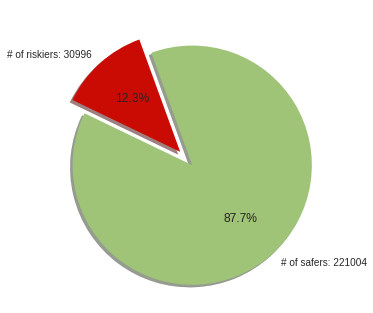

In [5]:
# defining labels 
yes_num = raw_train_dataset['Risk_Flag'].value_counts()[1]
no_num = raw_train_dataset['Risk_Flag'].value_counts()[0]
genus = ['# of riskiers: '+str(yes_num), '# of safers: '+str(no_num)]
# portion covered by each label 
slices = [yes_num, no_num]
colors = ['r', 'g']
plt.pie(slices, labels=genus, colors=colors,
    startangle=110, shadow=True, explode=(0.05, 0.1),
    radius=1.0, autopct='%1.1f%%')

According to the graph shown above, it is clear that this dataset has severe imbalance problem. The green section representing those users who are less likely to be potentially at risk is over 7 times larger than the number of potential riskiers. To make our model more convincing and generalizable, I will subsequently perform a data balancing operation on the dataset.

## Univariate Features

It can be seen that all the numerical features are `int64` type, so I use `select_dtypes` method to extract these numerical columns.

In [6]:
# get numeric columns
train_num = raw_train_dataset.select_dtypes(include=["int64"]).set_index("Id")
train_num.head()

Income  Age  Experience  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag
Id                                                                         
1   1303834   23           3                3                 13          0
2   7574516   40          10                9                 13          0
3   3991815   66           4                4                 10          0
4   6256451   41           2                2                 12          1
5   5768871   47          11                3                 14          1

### Numerical Columns

Here I define a plotting method to visualize some specific numerical features using hist.

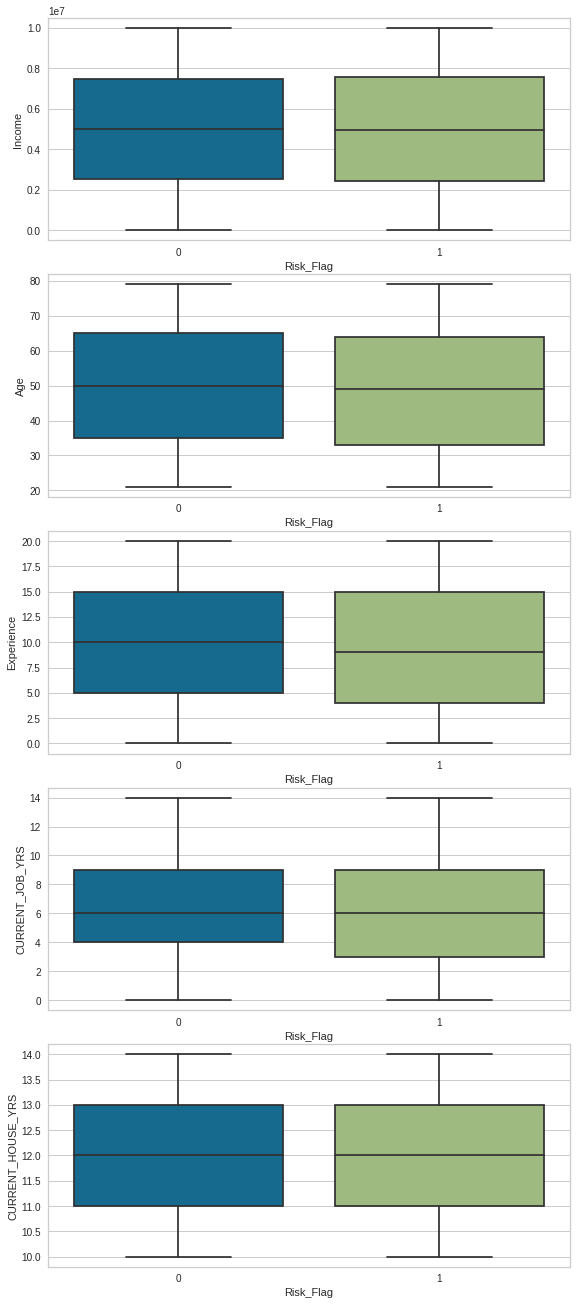

In [7]:
def num_sub_plots_box(df):
  """
  Input: numerical data
  Output: plots boxplots of the features compared to the label
  """
  num_plots = len(df.columns)
  fig, axs = plt.subplots(num_plots-1, 1, figsize=(8,3*num_plots))
  fig.tight_layout()
  for col, ax in enumerate(axs):
    if df.columns[col] != "Risk_Flag":
      sns.boxplot(data=df, y=df.columns[col], x="Risk_Flag", ax=ax)
        
num_sub_plots_box(train_num)

It appears that univariate does not provide a good division of the results, and it may be that some combination of characteristics can provide a more significant division of the results, including linear or exponential combinations.

### Cross-over Numerical Features

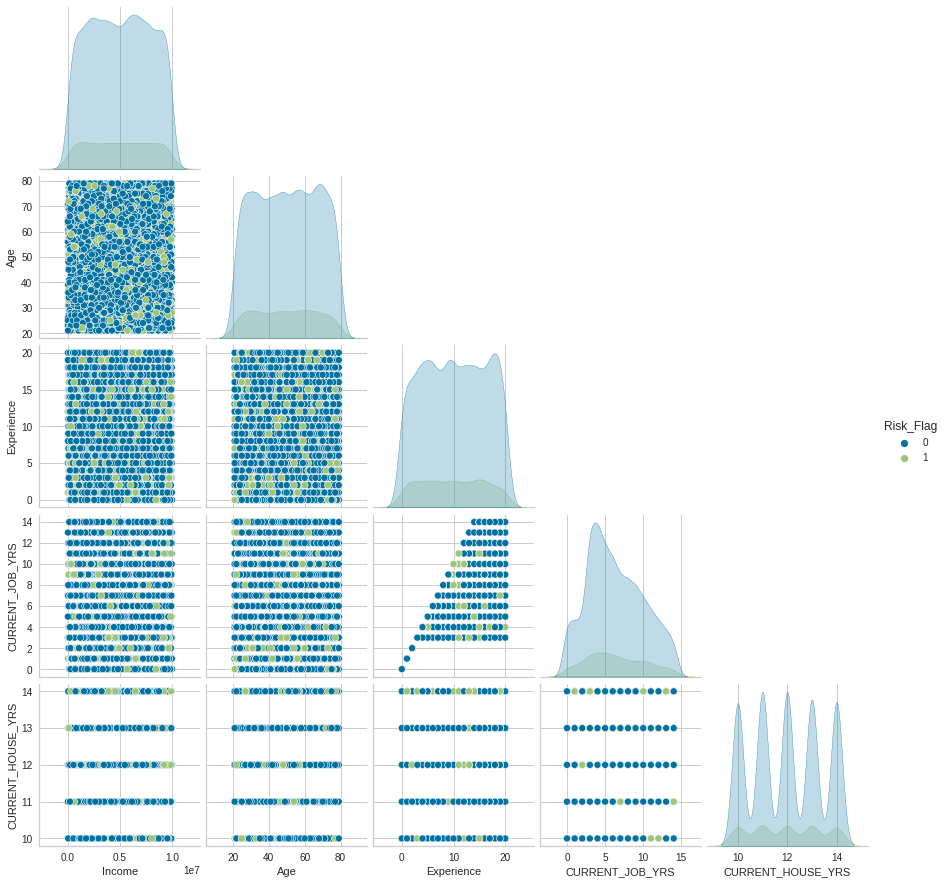

In [8]:
# linear combination
sns.pairplot(train_num.iloc[:10000,:], hue="Risk_Flag", corner=True);

We still failed to find some reasonable separation of target variable based on linear combination of numerical features. I will continue with polynomial combination in the following part.

In [9]:
# define a method to convert the values in dataframe into polynomial combination
def create_poly_df(train_num, poly):
  """
  Inputs: a numerical dataframe and number of polynomal features
  Output: a dataframe with polynomical feature combinations
  """
  
  polyclass = PolynomialFeatures(poly)
  train_poly = pd.DataFrame(data=polyclass.fit_transform(train_num.drop(labels="Risk_Flag", axis=1)),
                columns=polyclass.get_feature_names(), index=train_num.index)
  # adding target variable
  if train_poly.columns[-1] != "Risk_Flag":
    train_poly = pd.concat([train_poly, train_num["Risk_Flag"]],axis=1).drop(labels="1", axis=1)
      
  return train_poly

# polynomial combination nameMatching
def names_for_poly_df(df, degree):
  """
  Input: a numerical dataframe and degree of polynomial regression
  Output: returns a list of the polynomial feature column names in a more readable format
  """
  
  poly_cols = create_poly_df(df, degree).columns
  # connect the axis name to original data column
  poly_col_dic = {k:v for k,v in zip(poly_cols[:len(df.columns)-1], df.columns[:-1])}
  new_cols = []
  for col in poly_cols[:-1]:
    split_col_space = col.split(" ")
    temp_scol = []
    for scol in split_col_space:
      # if there are two factors, x0 and x1, 
      # we store it temporarily for multiplication later
      if len(split_col_space) > 1:
        temp_scol.append(scol.replace(scol[:2], poly_col_dic[scol[:2]]))
      else:
        new_cols.append(scol.replace(scol[:2], poly_col_dic[scol[:2]]))
    new_cols.append(" * ".join(temp_scol))
      
  names = [name for name in new_cols if name != ""]
  names.append("Risk_Flag")

  return names

print(names_for_poly_df(train_num, 2))
create_poly_df(train_num, 2).head()

['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Income^2', 'Income * Age', 'Income * Experience', 'Income * CURRENT_JOB_YRS', 'Income * CURRENT_HOUSE_YRS', 'Age^2', 'Age * Experience', 'Age * CURRENT_JOB_YRS', 'Age * CURRENT_HOUSE_YRS', 'Experience^2', 'Experience * CURRENT_JOB_YRS', 'Experience * CURRENT_HOUSE_YRS', 'CURRENT_JOB_YRS^2', 'CURRENT_JOB_YRS * CURRENT_HOUSE_YRS', 'CURRENT_HOUSE_YRS^2', 'Risk_Flag']


x0    x1    x2   x3    x4  ...  x2 x4  x3^2  x3 x4   x4^2  Risk_Flag
Id                                    ...                                      
1   1303834.0  23.0   3.0  3.0  13.0  ...   39.0   9.0   39.0  169.0          0
2   7574516.0  40.0  10.0  9.0  13.0  ...  130.0  81.0  117.0  169.0          0
3   3991815.0  66.0   4.0  4.0  10.0  ...   40.0  16.0   40.0  100.0          0
4   6256451.0  41.0   2.0  2.0  12.0  ...   24.0   4.0   24.0  144.0          1
5   5768871.0  47.0  11.0  3.0  14.0  ...  154.0   9.0   42.0  196.0          1

[5 rows x 21 columns]

With combination of features and name matching of varibles, we can define a temporary dataframe to analyse the correlation of new generated features and target variable.

In [10]:
temp_df = create_poly_df(train_num, 2)
temp_df.columns = names_for_poly_df(train_num, 2)
temp_df.head()

Income   Age  ...  CURRENT_HOUSE_YRS^2  Risk_Flag
Id                   ...                                
1   1303834.0  23.0  ...                169.0          0
2   7574516.0  40.0  ...                169.0          0
3   3991815.0  66.0  ...                100.0          0
4   6256451.0  41.0  ...                144.0          1
5   5768871.0  47.0  ...                196.0          1

[5 rows x 21 columns]

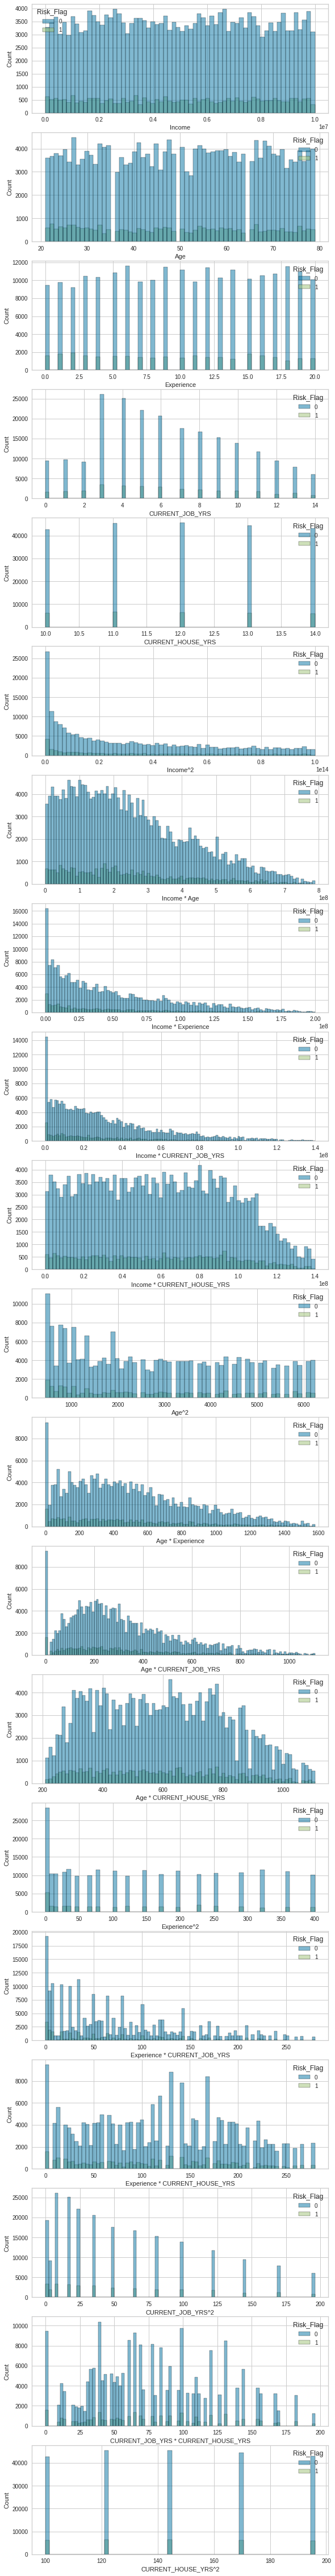

In [11]:
def num_sub_plots_hist(df):
  """
  Input: numerical data
  Output: plots histograms of the features compared to the label
  """
  num_plots = len(df.columns)
  fig, axs = plt.subplots(num_plots-1, 1, figsize=(8,3*num_plots))
  fig.tight_layout()
  for col, ax in enumerate(axs):
    if df.columns[col] != "Risk_Flag":
      sns.histplot(df, x=df.columns[col], hue="Risk_Flag",ax=ax)

num_sub_plots_hist(temp_df)

Unfortunately, polynomial combinations do not yeild better performance in terms of reasonable separation.

## Bivarite Analysis

I studied a number of potential relationships between the characteristics. For example, I analyse the connection between marital status and house_ownership, income levels in various marital status from different states, income levels in terms of various job years and car ownerships.

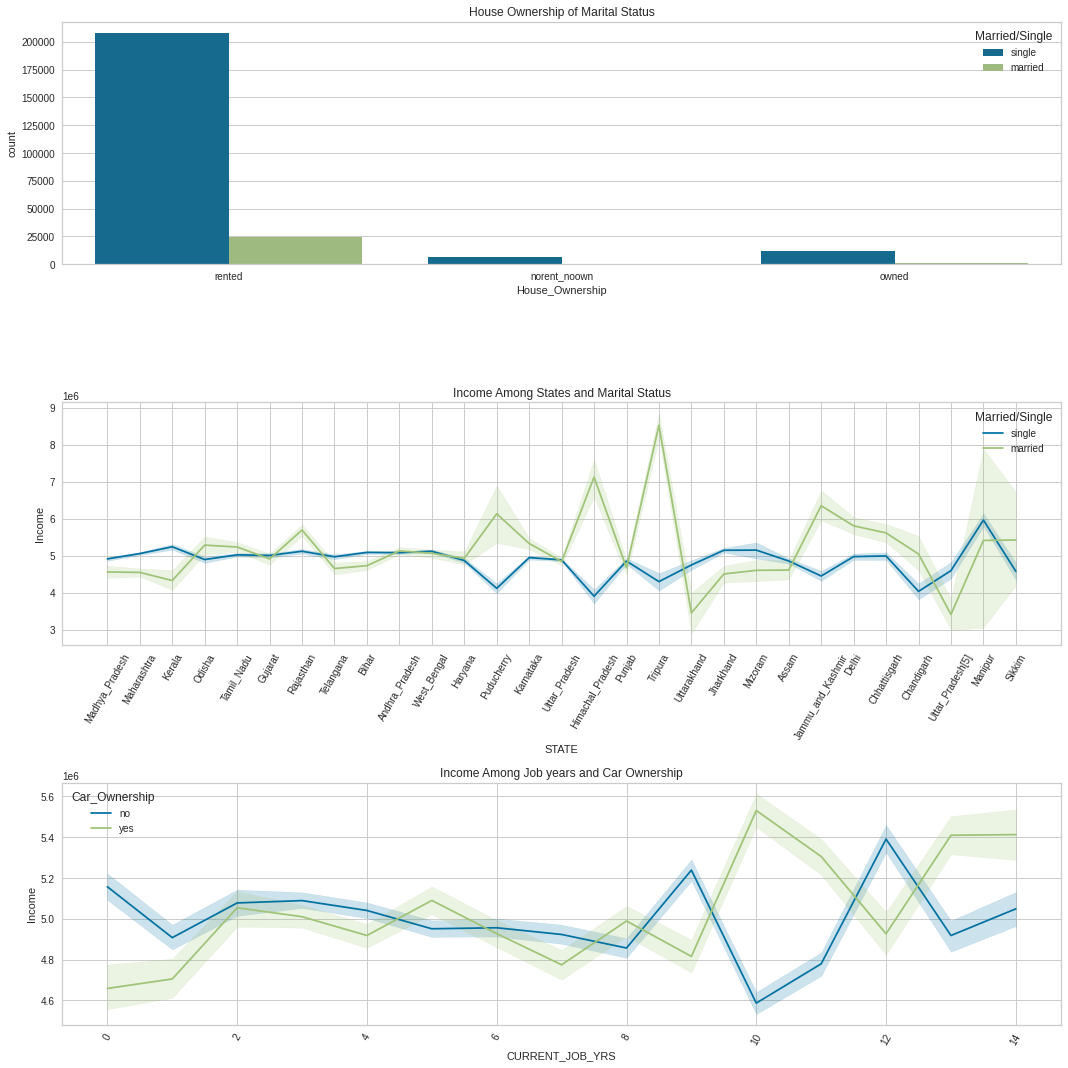

In [12]:
# plot the number of children, babies, adults and meal type in different hotels
fig, ax = plt.subplots(3, 1, figsize=(15,15))
sns.countplot(x='House_Ownership',
      hue='Married/Single',
      data=raw_train_dataset,
      ax=ax[0])
ax[0].set_title('House Ownership of Marital Status')

sns.lineplot(x="STATE", 
      y="Income",
      hue='Married/Single',
      data=raw_train_dataset,
      ax=ax[1])
ax[1].set_title('Income Among States and Marital Status')
for tick in ax[1].get_xticklabels():  # rotation x-axis at 60 degree
    tick.set_rotation(60)
    # tick.set_fontsize(7)

sns.lineplot(x="CURRENT_JOB_YRS", 
      y="Income",
      hue='Car_Ownership',
      data=raw_train_dataset,
      ax=ax[2])
ax[2].set_title('Income Among Job years and Car Ownership')
for tick in ax[2].get_xticklabels():  # rotation x-axis at 60 degree
    tick.set_rotation(60)

fig.tight_layout()

**Observation:**
- Most of the customers are single and all of the married customers miraculously rent, and very few have their own homes.
- Married people in Tripura have highest income while single people earn much lower in this state.
- The number of customers is distributed very evenly across the different job years. And the income varies immensely around 10 job years between poeple with no car and those own cars.

## 3.4 Preliminary Conclusion

1. Both the original features and the combined features are developed to effectively divide the target results by their own divisions alone. That is why we need to go further in feature engineering and modeling.
2. This dataset contains few data from married people, which makes some record seem to be uneven. This may caused by the fact that only single people will need such product. If so, the organization needs to invest more energy in singles.
3. In fact, resident states may not be suitable to be taken into consideration when assessing risk of a customer since the average incomes appear to be similar between different states. On the other hand, the extent to which marital status affects income varies widely by states.
4. Whether a customer own a car makes great importance when his job years is greater that 10. Additionally, we can draw that easily a person with a car is less likely in a loan since he has something including a car that can be used as collateral.



# Data Pre-Processing

In this section, we need to pre-process the data to make them better adapted to the training process.

## Label Encoding

Label encoding: Encodes the category of a categorical variable as a number.

Implemented with sklearn.preprocessing.LabelEncoder to encode categorical variables containing k categories as 0, 1, 2, ... (k-1)

Label encoding is generally not used for features, but for target variables.

In this case, if we encode `(single, married)` in `Married/Single` as `(0, 1)`, this will not fit the assumptions behind the model as machine learning models assume that the data has an arithmetic meaning, for example $0 < 1$, which implies $single < married$, but this relationship does not hold. Generally a unique hot code would be used to deal with categorical features and the label code would only be used for the categorical target.

In addition, in order to avoid multicollinearity problem in regression model, we apply **Dummy Variable Trap** to label encoding.

However, if I apply this method to all the categorical features, the dataset will end up with **408 columns**, whose number is currently 12. Thus, I choose to **group values in some features with too many unique values into bins** to reduce the feature columns. Such feature includes `Profession`, `City` and `State`.


In [13]:
train_cat = pd.concat([raw_train_dataset.select_dtypes(include=["object"]), raw_train_dataset["Risk_Flag"]], axis=1)
print("Total number of unique Professions: {}".format(train_cat["Profession"].nunique()))
print("Total number of unique Cities: {}".format(train_cat["CITY"].nunique()))
print("Total number of unique States: {}".format(train_cat["STATE"].nunique()))
train_cat

Total number of unique Professions: 51
Total number of unique Cities: 317
Total number of unique States: 29


Married/Single House_Ownership  ...           STATE Risk_Flag
0              single          rented  ...  Madhya_Pradesh         0
1              single          rented  ...     Maharashtra         0
2             married          rented  ...          Kerala         0
3              single          rented  ...          Odisha         1
4              single          rented  ...      Tamil_Nadu         1
...               ...             ...  ...             ...       ...
251995         single          rented  ...     West_Bengal         0
251996         single          rented  ...  Madhya_Pradesh         0
251997         single          rented  ...     Maharashtra         0
251998         single          rented  ...      Puducherry         0
251999         single          rented  ...      Tamil_Nadu         0

[252000 rows x 7 columns]

You can see there are too many unique values in these features, I try to encode the categorical values into numerical values, with larger value indicating larger `Risk_Flag` rate.

### Encoding of Excessive Unique-Value Features


First I created dictionaries for `Profession`, `City` and `State` respectively with keys as unique values and items as the relative `Risk_Flag` score for these features.By looping the dataset, the optimized scores will be updated in these dictionaries.

In [14]:
# create a df of categorical as index and risk_flag as columns,
# the values are the total counts.
def risk_flag_ranked_dictionary(df, feature):
  group_risk = df.groupby([feature,"Risk_Flag"])[feature].count().unstack()
  # print(group_risk)
  # loops through each row and updates the values as a percentage
  for row in group_risk.index:
    group_risk.loc[row] = group_risk.loc[row]/group_risk.loc[row].sum()

  # orders the values by highest percentage loan defaults first
  group_risk = group_risk.sort_values(by=1, ascending=True)
  group_risk["Risk_Rank"] = range(1,len(group_risk)+1)
  
  return group_risk["Risk_Rank"].to_dict()

In [15]:
# example of output:
risk_flag_ranked_dictionary(train_cat, "Profession")

{'Air_traffic_controller': 41,
 'Analyst': 24,
 'Architect': 37,
 'Army_officer': 49,
 'Artist': 27,
 'Aviator': 39,
 'Biomedical_Engineer': 32,
 'Chartered_Accountant': 50,
 'Chef': 25,
 'Chemical_engineer': 11,
 'Civil_engineer': 44,
 'Civil_servant': 19,
 'Comedian': 22,
 'Computer_hardware_engineer': 34,
 'Computer_operator': 29,
 'Consultant': 31,
 'Dentist': 9,
 'Design_Engineer': 6,
 'Designer': 8,
 'Drafter': 14,
 'Economist': 4,
 'Engineer': 20,
 'Fashion_Designer': 16,
 'Financial_Analyst': 5,
 'Firefighter': 42,
 'Flight_attendant': 28,
 'Geologist': 45,
 'Graphic_Designer': 15,
 'Hotel_Manager': 40,
 'Industrial_Engineer': 3,
 'Lawyer': 35,
 'Librarian': 13,
 'Magistrate': 23,
 'Mechanical_engineer': 10,
 'Microbiologist': 30,
 'Official': 43,
 'Petroleum_Engineer': 2,
 'Physician': 21,
 'Police_officer': 51,
 'Politician': 12,
 'Psychologist': 26,
 'Scientist': 46,
 'Secretary': 36,
 'Software_Developer': 47,
 'Statistician': 18,
 'Surgeon': 17,
 'Surveyor': 48,
 'Technica

In [16]:
def transform_categorical_to_risk_rank(row, dic):
  return dic[row]

In [17]:
for feature in ['Profession','CITY','STATE']:
  dic = risk_flag_ranked_dictionary(train_cat, feature)
  train_cat[feature] = train_cat[feature].apply(lambda row: transform_categorical_to_risk_rank(row, dic))
train_cat

Married/Single House_Ownership Car_Ownership  ...  CITY  STATE  Risk_Flag
0              single          rented            no  ...   166     25          0
1              single          rented            no  ...   170      9          0
2             married          rented            no  ...   193     27          0
3              single          rented           yes  ...   317     24          1
4              single          rented            no  ...   160      6          1
...               ...             ...           ...  ...   ...    ...        ...
251995         single          rented            no  ...    61     15          0
251996         single          rented            no  ...   166     25          0
251997         single          rented            no  ...    72      9          0
251998         single          rented            no  ...    81     11          0
251999         single          rented            no  ...   228      6          0

[252000 rows x 7 columns]

### Encoding Using One-hot

You can see that I finished encoding the features with too many unique values, and next I need to encode the remaining features with unique heat. Here I used `drop_first=True` parameter to avoid multicollinearity in Linear based models.

In [18]:
def features_to_one_hot(df):
  """
  Input: The categorical data frame.
  Output:  The dataframe with one-hot encoded features, 
       drop_first is used to remove redundant features and prevent
       multicollinearity. 
  """
  for feature in df.columns[0:3]:
    df = pd.concat([pd.get_dummies(df[feature], drop_first=True), df.drop(labels=feature,axis=1)],axis=1)
      
  return df
  
train_cat = features_to_one_hot(train_cat)
train_cat

yes  owned  rented  single  Profession  CITY  STATE  Risk_Flag
0         0      0       1       1          10   166     25          0
1         0      0       1       1          47   170      9          0
2         0      0       1       0          38   193     27          0
3         1      0       1       1          47   317     24          1
4         0      0       1       1          19   160      6          1
...     ...    ...     ...     ...         ...   ...    ...        ...
251995    0      0       1       1          17    61     15          0
251996    0      0       1       1          49   166     25          0
251997    0      0       1       1           6    72      9          0
251998    0      0       1       1          15    81     11          0
251999    0      0       1       1          18   228      6          0

[252000 rows x 8 columns]

### Combine Dataset

Next we need to combine the encoded categorical features with the numerical features.

In [19]:
def combine_dfs(df1, df2):
  if df1.index[0] > 0:
    df1.index -= 1 # fix index shift
  train_df = pd.concat([df1, df2], axis=1)
  new_col_names = [col.lower().capitalize() for col in train_df.columns]
  train_df.columns = new_col_names
  return train_df

combined_df = combine_dfs(train_num.drop("Risk_Flag", axis=1), train_cat)
combined_df

Income  Age  Experience  ...  City  State  Risk_flag
0       1303834   23           3  ...   166     25          0
1       7574516   40          10  ...   170      9          0
2       3991815   66           4  ...   193     27          0
3       6256451   41           2  ...   317     24          1
4       5768871   47          11  ...   160      6          1
...         ...  ...         ...  ...   ...    ...        ...
251995  8154883   43          13  ...    61     15          0
251996  2843572   26          10  ...   166     25          0
251997  4522448   46           7  ...    72      9          0
251998  6507128   45           0  ...    81     11          0
251999  9070230   70          17  ...   228      6          0

[252000 rows x 13 columns]

## Imbalanced Dataset Processing

Based on our previous analysis, we can learn that this dataset is extremely unbalanced, with a disproportionately low percentage of riskers. We need to balance it to enhance the model performance.

In [20]:
X_columns = combined_df.columns.values.tolist()
X_columns.remove("Risk_flag")
X_train_raw = combined_df[X_columns]
y_train_raw = combined_df["Risk_flag"]
X_train, X_test, y_train, y_test = train_test_split(X_train_raw,y_train_raw,test_size=0.33,shuffle=True,random_state=42)

### Random undersampling 

There is also a method available in the `imblearn` library for undersampling, `under_sampling.RandomUnderSampler`, which we can use to bring in the method and call it. As can be seen, the original number of `1` in `Risk_Flag` is 221004, and after undersampling it becomes the same number as `0` at 30996, achieving a 50%/50% category distribution.

In [21]:
def RandomUnderSampler_imbc(X, y):
  # splite X and y
  X_train = X
  y_train = y
  # calculate the current category share
  print("Before undersampling: ", Counter(y_train))
  # Calling methods for undersampling
  undersample = RandomUnderSampler(sampling_strategy='auto')
  # Obtaining undersampled samples
  X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
  # calculate percentage of categories after undersampling
  print("After undersampling: ", Counter(y_train_under))
  return X_train_under, y_train_under

# X_train_under, y_train_under=RandomUnderSampler_imbc(X_train, y_train)

### Oversampling with SMOTE

Among the oversampling techniques, SMOTE(Synthetic Minority Oversampling Technique) is considered as one of the most popular data sampling algorithms, which is based on a modified version of the random oversampling algorithm. Since random oversampling only adopts the strategy of simply copying samples for sample augmentation, this way leads to a more immediate problem of overfitting. Therefore, the basic idea of SMOTE is to analyze a few classes of samples and synthesize new samples to add to the dataset.


> The algorithm flow is as follows.
>
> (1) For each sample x in the minority class, calculate its distance to all samples in the minority class sample set in terms of Euclidean distance to obtain its k-nearest neighbors.
>
> (2) Set a sampling ratio according to the sample imbalance ratio to determine the sampling multiplicity N. For each sample x in the minority class, select a number of samples at random from its k-nearest neighbors, assuming the selected nearest neighbors are xn.
>
> (3) For each randomly selected nearest neighbor xn, construct a new sample with the original sample according to the following formula, respectively.


In [22]:
def SMOTE_imbc(X, y):
  X_train = X
  y_train = y
  # calculate the current category share
  print("Before undersampling: ", Counter(y_train))
  # Obtaining undersampled samples
  X_train_SMOTE, y_train_SMOTE = SMOTE().fit_resample(X_train, y_train)
  # calculate percentage of categories after oversampling
  print("After undersampling: ", Counter(y_train_SMOTE))
  return X_train_SMOTE, y_train_SMOTE

# SMOTE_imbc(X_train, y_train)

### Combination of undersampling and oversampling (pipeline)

So if we need to use both oversampling and undersampling, how do we do it? It is very simple to use pipeline.

In [23]:
def UandO_imbc_withModel(X_train, y_train, o=0.4, u=0.5):
  #  define the pipeline
  X = X_train
  y = y_train
  over = SMOTE(sampling_strategy=o)
  under = RandomUnderSampler(sampling_strategy=u)
  steps = [('over', over), ('under', under)]
  pipeline = Pipeline(steps=steps)
  return pipeline.fit_resample(X, y)
type(UandO_imbc_withModel(X_train, y_train))

tuple

### Get the best sampling rate

In the above examples, we have sampled 50:50 by default, but this sampling ratio is not optimal, so we introduce a concept called optimal sampling rate, and then we find this optimal point by setting the sampling ratio and sampling grid search method.

In [24]:
def BestSamplingRate_imbc(X_train, y_train):
  X = X_train
  y = y_train
  over_values = [0.2,0.3,0.4,0.5]
  under_values = [0.8,0.7,0.6,0.5]
  for o in over_values:
    for u in under_values:
      # define pipeline
      model = XGBClassifier(n_estimators=200,max_depth=10,tree_method='gpu_hist')
      # model = XGB
      over = SMOTE(sampling_strategy=o)
      under = RandomUnderSampler(sampling_strategy=u)
      steps = [('over', over), 
            ('under', under), 
            ('normalizer', StandardScaler()),
            ('model', model)]
      pipeline = Pipeline(steps=steps)

      # fit with pipline
      out = pipeline.fit(X, y)

      # evaluate pipeline
      score = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)
      scores = np.mean(score)
      print('SMOTE oversampling rate:%.1f, Random undersampling rate:%.1f , Mean ROC AUC: %.8f' % (o, u, scores))

      max_o, max_u, max_s = 0, 0, 0
      if scores > max_s: 
        max_o, max_u, max_s = o, u, scores
  return max_o, max_u, max_s

In [ ]:
max_o, max_u, max_s = BestSamplingRate_imbc(X_train, y_train)

SMOTE oversampling rate:0.2, Random undersampling rate:0.8 , Mean ROC AUC: 0.91801664
SMOTE oversampling rate:0.2, Random undersampling rate:0.7 , Mean ROC AUC: 0.91830383
SMOTE oversampling rate:0.2, Random undersampling rate:0.6 , Mean ROC AUC: 0.91905403
SMOTE oversampling rate:0.2, Random undersampling rate:0.5 , Mean ROC AUC: 0.91927119
SMOTE oversampling rate:0.3, Random undersampling rate:0.8 , Mean ROC AUC: 0.91696026
SMOTE oversampling rate:0.3, Random undersampling rate:0.7 , Mean ROC AUC: 0.91712354
SMOTE oversampling rate:0.3, Random undersampling rate:0.6 , Mean ROC AUC: 0.91674637
SMOTE oversampling rate:0.3, Random undersampling rate:0.5 , Mean ROC AUC: 0.91836704
SMOTE oversampling rate:0.4, Random undersampling rate:0.8 , Mean ROC AUC: 0.91586515
SMOTE oversampling rate:0.4, Random undersampling rate:0.7 , Mean ROC AUC: 0.91753641
SMOTE oversampling rate:0.4, Random undersampling rate:0.6 , Mean ROC AUC: 0.91616681
SMOTE oversampling rate:0.4, Random undersampling rate

I used GPU to accelerate the XGBoost model training, yet it still took a while to complete. (1667.491s)

We can see that `Mean ROC AUC` peaks at 0.91927119 (May differ from each runtime) when SMOTE oversampling rate and Random undersampling rate are 0.2 and 0.5 respectively. Thus, we use the best rate `o=0.2` and `u=0.5` to process imbalanced data for the following procedures.

Similarly, `X_train` and `y_train` are the date set without crossed features which `X_g_train` and `y_g_train` contain. `X_train_all_feature` and `X_test_all_feature` here are used in the `knn` method to show the impact of feature selection

In [25]:
X_train, y_train = UandO_imbc_withModel(X_train, y_train, 0.2, 0.5)

## Data Split

In fact, the dataset has split itself two parts for training and testing respectively, which can be imported by:

In [26]:
raw_train_dataset = pd.read_csv("./data/TrainingData.csv")
raw_test_df = pd.read_csv("./data/TestData.csv")
raw_targets = pd.read_csv("./data/SamplePredictionDataset.csv")

However, noticed that there is no target variable in `raw_test_df`, which means the testing data is a set of unseen data. Actually, the values of target variables in `raw_test_df` are stored in `raw_targets`. In order to processing crossing validation and some other operations, I use `raw_train_dataset` here to do the data splitting and modeling, and I will use `raw_test_df` to test the performance of models on unseen data.

In [27]:
def import_data(train=True):
  """
  Input: Bool asking for either train or test data to be returned
  Output: Either the training data or the test data
  """
  
  if train:
    return pd.read_csv("./data/TrainingData.csv")
  else:
    df_test = pd.read_csv("./data/TestData.csv")
    df_test.rename(columns={"ID":"Id"}, inplace=True)
    targets = pd.read_csv("./data/SamplePredictionDataset.csv")
    targets.rename(columns={"id":"Id", "risk_flag":"Risk_Flag"}, inplace=True)
    
    return pd.concat([df_test,targets.drop("Id",axis=1)],axis=1)

In case that we spare the raw test dataset to be used for testing performance on unseen data, we apply `train_test_split` here to splite training dataset to sub-datasets for training and validation respectively.

In [28]:
def train_valid_split(combined_df):
  X_columns = combined_df.columns.values.tolist()
  X_columns.remove("Risk_flag")
  X_train_raw = combined_df[X_columns]
  y_train_raw = combined_df["Risk_flag"]
  X_train, X_valid, y_train, y_valid = train_test_split(X_train_raw,y_train_raw,test_size=0.2,shuffle=True,random_state=42)
  return X_train, X_valid, y_train, y_valid

# Supervised Learning Task

## Establishing Pipeline

I have extracted the series of data preprocessing parts described earlier and integrated them in this function to operate on different data sets. Note that I put the data balancing problem in the modeling pipeline using the best parameters previously trained to handle it.

In [29]:
# return combined_df
def data_prepro(whetherTrainSet):
  raw_dataset = import_data(train=whetherTrainSet)
  train_num = raw_dataset.select_dtypes(include=["int64"]).set_index("Id")
  train_cat = pd.concat([raw_dataset.select_dtypes(include=["object"]), raw_dataset["Risk_Flag"]], axis=1)
  for feature in ['Profession','CITY','STATE']:
    dic = risk_flag_ranked_dictionary(train_cat, feature)
    train_cat[feature] = train_cat[feature].apply(lambda row: transform_categorical_to_risk_rank(row, dic))
  train_cat = features_to_one_hot(train_cat)
  combined_df = combine_dfs(train_num.drop("Risk_Flag", axis=1), train_cat)
  return combined_df

Here I used the parameter for `SMOTE` and `RandomUnderSampler` trained before to build a pipeline. The default model here is set to be `LogisticRegression`, which I will redefine later.

In [30]:
X_train, X_valid, y_train, y_valid = train_valid_split(data_prepro(True))
# define pipeline
pipeline = Pipeline([
  ('over', SMOTE(sampling_strategy=0.2)), 
  ('under', RandomUnderSampler(sampling_strategy=0.6)), 
  ('normalizer', StandardScaler()),
  ('clf', LogisticRegression(class_weight='balanced'))
])

## Preliminary Modeling

In the following, we use several models for training, where the parameters of each model are preset and untuned.

Models applied:
- Logistic Regression
- Decision Tree
- XGBoost
- AdaBoost
- Gradient Boosting
- Sequential (Neural Network Model)

### Classical Models

In [31]:
clfs = []
clfs.append(LogisticRegression())
clfs.append(DecisionTreeClassifier(max_depth=10))
clfs.append(RandomForestClassifier(max_depth=10,random_state=None))
clfs.append(XGBClassifier(n_estimators=200,max_depth=10,tree_method='gpu_hist'))
clfs.append(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),n_estimators=100))
clfs.append(GradientBoostingClassifier(n_estimators=100,max_depth=10))
clfs.append(GaussianNB())
clfs.append(KNeighborsClassifier(n_neighbors=5))

score_dict_1 = {}
classifier_name = ['lm','dt','rf','xgb','ada','gb','gaus','knn']

The following training might cost plenty of time, so I have stored the result in `without_feature_seletcion.csv` file

In [32]:
for i, classifier in enumerate(clfs):
  pipeline.set_params(clf = classifier)
  scores = cross_validate(pipeline, X_train, y_train,cv=4)
  score_dict_1[classifier_name[i]] = scores
  print('##############MODEL################')
  print(str(classifier))
  print('--------------score----------------')
  for key, values in scores.items():
    print(key,' mean ', round(values.mean(),4))
    print(key,' std ', round(values.std(),4))

##############MODEL################
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
--------------score----------------
fit_time  mean  0.4784
fit_time  std  0.0096
score_time  mean  0.0141
score_time  std  0.0002
test_score  mean  0.8075
test_score  std  0.0008
##############MODEL################
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'

In [33]:
score_df_1 = pd.DataFrame()

for c in classifier_name:
  temp = pd.DataFrame(score_dict_1[c])
  temp['classifier'] = c
  score_df_1 = pd.concat((score_df_1,temp),axis=0)
score_df_1.to_csv('./trained_model/modeling_without_tunning.csv')

### Neural Network

Before we set up the neural network model, we need to do data resampling and normalization.

In [34]:
X_train_res, y_train_res = UandO_imbc_withModel(X_train, y_train, 0.2, 0.6)
std_scale = StandardScaler().fit(X_train_res)
X_train_norm = std_scale.transform(X_train_res)
X_valid_norm = std_scale.transform(X_valid)

Then we construct neural network structure based on the data above.

In [35]:
# constructe the neural network structure
combined_df = data_prepro(True)
X_columns = combined_df.columns.values.tolist()
X_columns.remove("Risk_flag")
X_train_raw = combined_df[X_columns]
y_train_raw = combined_df["Risk_flag"]

n,m = X_train_raw.values.shape
model = Sequential()
model.add(Dense(100,input_dim=m,activation='tanh'))
model.add(Dense(200,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [36]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callback = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

I did themModel training & evaluation in the following part, which may consume quite a long time, I have stored the result in `supervised_nn.h5` file

In [37]:
# fit the nn model
history = model.fit(X_train_norm,y_train_res,validation_split=0.1,
           epochs=100,batch_size=32,callbacks=[callback],verbose=1,shuffle=True)

Epoch 1/100
2653/2653 [==============================] - 14s 4ms/step - loss: 0.5961 - accuracy: 0.6967 - val_loss: 1.0338 - val_accuracy: 0.0881
Epoch 2/100
2653/2653 [==============================] - 10s 4ms/step - loss: 0.5884 - accuracy: 0.7015 - val_loss: 1.0581 - val_accuracy: 0.1095
Epoch 3/100
2653/2653 [==============================] - 10s 4ms/step - loss: 0.5840 - accuracy: 0.7038 - val_loss: 1.0838 - val_accuracy: 0.1073
Epoch 4/100
2653/2653 [==============================] - 10s 4ms/step - loss: 0.5766 - accuracy: 0.7082 - val_loss: 0.9693 - val_accuracy: 0.1745
Epoch 5/100
2653/2653 [==============================] - 10s 4ms/step - loss: 0.5662 - accuracy: 0.7144 - val_loss: 0.9817 - val_accuracy: 0.2898
Epoch 6/100
2653/2653 [==============================] - 10s 4ms/step - loss: 0.5521 - accuracy: 0.7246 - val_loss: 1.0046 - val_accuracy: 0.2355
Epoch 7/100
2653/2653 [==============================] - 10s 4ms/step - loss: 0.5373 - accuracy: 0.7339 - val_loss: 0.9238 -

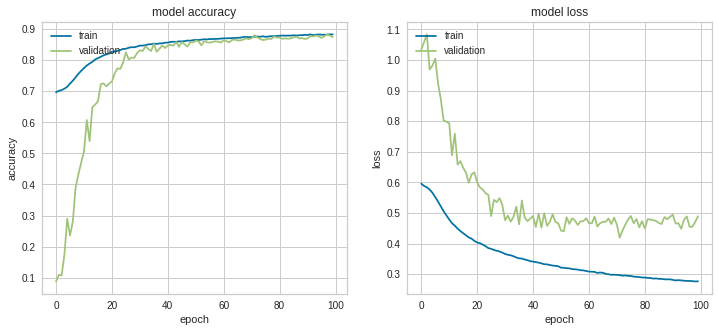

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
# summarize history for accuracy
ax1 = ax[0]
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')

# summarize history for loss
ax2 = ax[1]
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')
plt.show()

In [39]:
model.save('./trained_model/supervised_nn.h5')

In [40]:
nn_model = load_model('./trained_model/supervised_nn.h5')
# performance in the test set
combined_df = data_prepro(False)
X_columns = combined_df.columns.values.tolist()
X_columns.remove("Risk_flag")
X_test_raw = combined_df[X_columns]
y_test_raw = combined_df["Risk_flag"]

std_scale = StandardScaler().fit(X_test_raw)
X_test_norm = std_scale.transform(X_test_raw)

y_pred = nn_model.predict(X_test_norm)
y_pred = np.where(y_pred>0.5,1,0)
print(classification_report(y_pred,y_test_raw))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79     20280
           1       0.28      0.13      0.18      7720

    accuracy                           0.67     28000
   macro avg       0.50      0.50      0.49     28000
weighted avg       0.60      0.67      0.62     28000



## Model Improving

In this part, I will try to improve the model performance by tunning model hyper-parameter. In case that I have already applied feature selection on the dataset and the number of features is quite small, I will not consider feature selection in this part.

In addition, some parameters in models can be tunned to improve performance. Here I will explore several models considering their evaluation result above.

- Gradient Boosting
- Decision Tree
- Xgboost

### GB hyper-parameter tunning

In [41]:
gb_param_grid = [    
  {'clf__n_estimators' : [100,120],
  'clf__max_depth' : range(9,12),
  'clf__min_samples_split' : [5,6],
  'clf__min_samples_leaf' : [3,6]
  }
]

In [42]:
gb_pipeline = pipeline.set_params(clf = GradientBoostingClassifier())
gb_clf = GridSearchCV(gb_pipeline, param_grid = gb_param_grid, cv=4, verbose=True, n_jobs=4)

The result of this training part has been stored in file `gb_grid_result.csv`, considering its costing of time.

In [43]:
# grid search for linear model
gb_grid_clf = gb_clf.fit(X_train,y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 17.3min
[Parallel(n_jobs=4)]: Done  96 out of  96 | elapsed: 41.5min finished


In [44]:
gb_result = pd.DataFrame(gb_grid_clf.cv_results_).sort_values(by='rank_test_score')
gb_result.to_csv('./trained_model/gb_grid_result.csv')

### RF hyper-parameter tunning

In [45]:
rf_param_grid = [    
  {
  'clf__max_depth' : range(17,20),
  'clf__min_samples_leaf' : range(7,10),
  'clf__min_samples_split' : range(8,11),
  'clf__n_estimators' : [100,300,450], 
  }
]

In [46]:
rf_pipeline = pipeline.set_params(clf = RandomForestClassifier())
rf_clf = GridSearchCV(rf_pipeline, param_grid = rf_param_grid, cv=4, verbose=True, n_jobs=4)

The result of this training part has been stored in file `rf_grid_result.csv`, considering its costing of time.

In [47]:
rf_grid_clf = rf_clf.fit(X_train,y_train)

Fitting 4 folds for each of 81 candidates, totalling 324 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 12.7min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 59.2min
[Parallel(n_jobs=4)]: Done 324 out of 324 | elapsed: 100.1min finished


In [48]:
rf_result = pd.DataFrame(rf_grid_clf.cv_results_).sort_values(by='rank_test_score')
rf_result.to_csv('./trained_model/rf_grid_result.csv')

### Xgb hyper-parameter tunning

To decrease the time cost, I will tune this model by two steps:
1. Tune the `max_depth`, `min_child_weight`, `sub_sample` and `colsample_bytree`
2. Tune the `n-estimator`

**Tune the `max_depth`, `min_child_weight`, `sub_sample` and `colsample_bytree`**

In [49]:
xgb_param_grid = [    
  {
  'clf__max_depth' : range(7,11),
  'clf__min_child_weight' : range(6,9),
  'clf__subsample' : [0.85,0.9,0.95],
  'clf__colsample_bytree' : [0.5,0.6,0.7],
  }
]

In [50]:
xgb_pipeline = pipeline.set_params(clf = XGBClassifier(tree_method='gpu_hist',n_estimators=200))
xgb_clf = GridSearchCV(xgb_pipeline, param_grid = xgb_param_grid, cv=4, verbose=True,n_jobs=4)

The result of this training part has been stored in file `xgb_gird_result1.csv`, considering its costing of time.

In [51]:
# grid search for xgboost classifier
xgb_grid_clf = xgb_clf.fit(X_train,y_train)

Fitting 4 folds for each of 108 candidates, totalling 432 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  4.3min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 26.4min
[Parallel(n_jobs=4)]: Done 432 out of 432 | elapsed: 63.8min finished


In [52]:
xgb_result = pd.DataFrame(xgb_grid_clf.cv_results_).sort_values(by='rank_test_score')
xgb_result.to_csv('./trained_model/xgb_grid_result1.csv')

**Tune the `n-estimator`**

In [53]:
xgb_clf_b = xgb_grid_clf.best_estimator_['clf']

In [54]:
xgb_param_grid2 = [    
  {
  'clf__n_estimators': range(50,500,50),
  }
]

In [55]:
xgb_pipeline2 = pipeline.set_params(clf = xgb_clf_b)
xgb_clf2 = GridSearchCV(xgb_pipeline2, param_grid = xgb_param_grid2, cv=4, verbose=True,n_jobs=4)

The result of this training part has been stored in file `xgb_gird_result2.csv`, considering its costing of time.

In [56]:
# grid search for xgboost
xgb_grid_clf2 = xgb_clf2.fit(X_train,y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 out of  36 | elapsed:  7.4min finished


In [57]:
xgb_result2 = pd.DataFrame(xgb_grid_clf2.cv_results_).sort_values(by='rank_test_score')
xgb_result2.to_csv('./trained_model/xgb_grid_result2.csv')

## Model Selection

In this part, I will visualize the results obtained above to complete the following tasks:

- Visualization of model performance with tunned hyper-parameter v.s. pre-set parameters ones;
- Model recommendation in terms of bussiness usage.

### Model Tunning

In [58]:
# load trained models

mdt_result = pd.read_csv('./trained_model/modeling_without_tunning.csv')
mdt_result = mdt_result.rename(columns={'Unnamed: 0': 'cv_round'})
mdt_result['cv_round'] = mdt_result['cv_round']+1

gb_grid = pd.read_csv('./trained_model/gb_grid_result.csv')
rf_grid = pd.read_csv('./trained_model/rf_grid_result.csv')
xgb_grid = pd.read_csv('./trained_model/xgb_grid_result1.csv')
xgb_grid2 = pd.read_csv('./trained_model/xgb_grid_result2.csv')

df_new = pd.DataFrame()
col_list = ['test_score','fit_time','score_time']
df_1 = mdt_result.groupby('classifier').mean()
df_new = pd.DataFrame(df_1)
df_new.reset_index(inplace=True)

df_new

classifier  cv_round   fit_time  score_time  test_score
0        ada       2.5  26.910734    1.043182    0.872996
1         dt       2.5   0.549227    0.016421    0.829375
2       gaus       2.5   0.315631    0.016277    0.659821
3         gb       2.5  30.704935    0.310753    0.886959
4        knn       2.5   7.820528   14.755533    0.875476
5         lm       2.5   0.478417    0.014092    0.807475
6         rf       2.5   5.646167    0.598990    0.883631
7        xgb       2.5  14.441627    0.039679    0.887307

In [59]:
gb_grid_best = gb_grid.loc[0,:]
rf_grid_best = rf_grid.loc[0,:]
xgb_grid_best = xgb_grid.loc[0,:]

tune_score_before = df_new.loc[[3,6,7],['classifier','test_score']]
tune_score_before.columns = ['classifier','score']
tune_score_list = [gb_grid_best['mean_test_score'],rf_grid_best['mean_test_score'],xgb_grid_best['mean_test_score']]
tune_score_after = pd.DataFrame()
tune_score_after['score'] = tune_score_list
tune_score_after['classifier'] = ['gb','rf','xgb']
tune_score = pd.concat((tune_score_before,tune_score_after),axis=0)
tune_score['tune hyper-parameter'] = ['no']*3 + ['yes']*3
tune_score.reset_index(inplace=True)
tune_score

index classifier     score tune hyper-parameter
0      3         gb  0.886959                   no
1      6         rf  0.883631                   no
2      7        xgb  0.887307                   no
3      0         gb  0.888661                  yes
4      1         rf  0.896076                  yes
5      2        xgb  0.890397                  yes

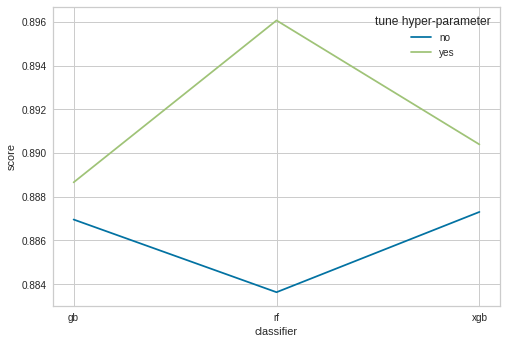

In [60]:
# plot the tuning result 
sns.lineplot(x="classifier", 
      y="score", 
      hue="tune hyper-parameter", 
      data=tune_score)

We can see that the performances of these models are imporved by different degree after parameter tunning, especially the RandomForest.

### Unseen Data Performance

In [61]:
# performance in the unseen test set
unseen_df = data_prepro(False)
X_unseen_columns = unseen_df.columns.values.tolist()
X_unseen_columns.remove("Risk_flag")
X_unseen_test_raw = unseen_df[X_unseen_columns]
y_unseen_test_raw = unseen_df["Risk_flag"]

# define pipeline
pipeline = Pipeline([
  ('over', SMOTE(sampling_strategy=0.2)), 
  ('under', RandomUnderSampler(sampling_strategy=0.6)), 
  ('normalizer', StandardScaler()),
  ('clf', LogisticRegression(class_weight='balanced'))
])

**Gradient Boosting Classifier**

In [62]:
gb_best_param = ast.literal_eval(gb_grid_best['params'])

# create pipeline and load the best parameters
gb_test_model = pipeline.set_params(clf = GradientBoostingClassifier())
gb_test_model = gb_test_model.set_params(**gb_best_param)

gb_test_model.fit(X_train,y_train)
y_pred = gb_test_model.predict(X_unseen_test_raw)
print(classification_report(y_pred,y_unseen_test_raw))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87     24218
           1       0.16      0.15      0.16      3782

    accuracy                           0.78     28000
   macro avg       0.52      0.51      0.52     28000
weighted avg       0.77      0.78      0.78     28000



In [63]:
gb_test_model['clf']

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=6, min_samples_split=6,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [64]:
# record the feature importance for Gradient Boosting
gb_importance = np.abs(gb_test_model['clf'].feature_importances_)

**Random Forest Classsifier**

In [65]:
rf_best_param = ast.literal_eval(rf_grid_best['params'])

rf_test_model = pipeline.set_params(clf = RandomForestClassifier())
rf_test_model = rf_test_model.set_params(**rf_best_param)

# create pipeline and load the best parameters
rf_test_model.fit(X_train,y_train)
y_pred = rf_test_model.predict(X_unseen_test_raw)
print(classification_report(y_pred,y_unseen_test_raw))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92     27227
           1       0.04      0.17      0.06       773

    accuracy                           0.85     28000
   macro avg       0.51      0.52      0.49     28000
weighted avg       0.95      0.85      0.90     28000



In [66]:
# record the feature importance for decision tree
rf_importance = np.abs(rf_test_model['clf'].feature_importances_)

**Xgboost Classifier**

In [67]:
xgb_grid_best2 = xgb_grid2.loc[0,:]
xgb_best_param = ast.literal_eval(xgb_grid_best['params'])
xgb_best_param2 = ast.literal_eval(xgb_grid_best2['params'])

# create pipeline and load the best parameters/xgboost_version == 0.90/ GPU support is needed
xgb_test_model = pipeline.set_params(clf = XGBClassifier(tree_method='gpu_hist'))
xgb_test_model = xgb_test_model.set_params(**xgb_best_param)
xgb_test_model = xgb_test_model.set_params(**xgb_best_param2)

xgb_test_model.fit(X_train,y_train)
y_pred = xgb_test_model.predict(X_test)
print(classification_report(y_pred,y_test))

# record the feature importance from xgboost classifier
xgb_importance = np.abs(xgb_test_model['clf'].feature_importances_)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94     68933
           1       0.76      0.54      0.63     14227

    accuracy                           0.89     83160
   macro avg       0.83      0.75      0.78     83160
weighted avg       0.88      0.89      0.88     83160



### Conclusion

- As shown above, xgboost should be recommended for prediction with GPU supported, which has the best accuracy score and efficency among models.
- If GPU is not accessiable, the Random Forest model with hyper-parameter tunning is preferred when making prediction.

## Model Explanation

### Feature Importance Visualization

In [68]:
feature_names = np.array(X_train.columns)

# transform the feature importance dataframe
def imp_df(importance,feature_name):
  m = max(importance.shape)
  importance = importance.reshape(m,)
  df_imp = pd.DataFrame({'importance':importance,
             'feature_name':feature_name})
  df_imp = df_imp.sort_values(by='importance',ascending=False)
  df_imp = df_imp.reset_index(drop=True)
  df_imp = df_imp.iloc[:20,:]
  return df_imp

**Gradient Boosting Classifier**

Text(0.5, 1.0, 'Feature Importance from Gradient Boosting Model')

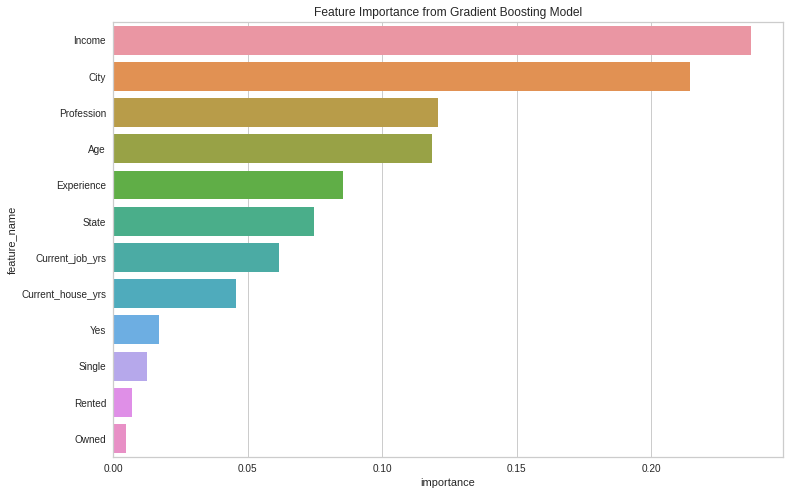

In [69]:
gb_importance = abs(gb_importance)
gb_imp = imp_df(gb_importance,feature_names)
plt.figure(figsize=(12,8))
sns.barplot(
    y = 'feature_name',
    x = 'importance',
    data = gb_imp,
    orient='h',
)
plt.title('Feature Importance from Gradient Boosting Model')

**Random Forest Classifier**

Text(0.5, 1.0, 'Feature Importance from Random Forest Model')

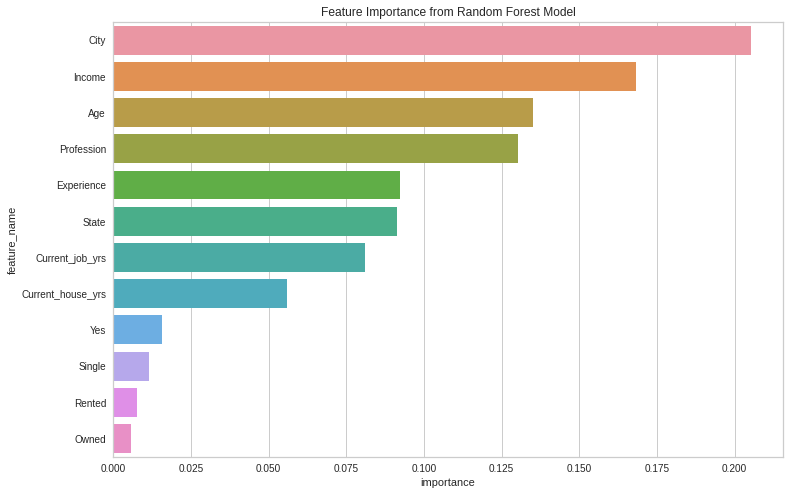

In [70]:
rf_imp = imp_df(rf_importance,feature_names)

plt.figure(figsize=(12,8))
sns.barplot(
    y = 'feature_name',
    x = 'importance',
    data = rf_imp,
    orient='h',
)
plt.title('Feature Importance from Random Forest Model')

**Xgboost Classifier**

Text(0.5, 1.0, 'Feature Importance from Xgboost Tree Model')

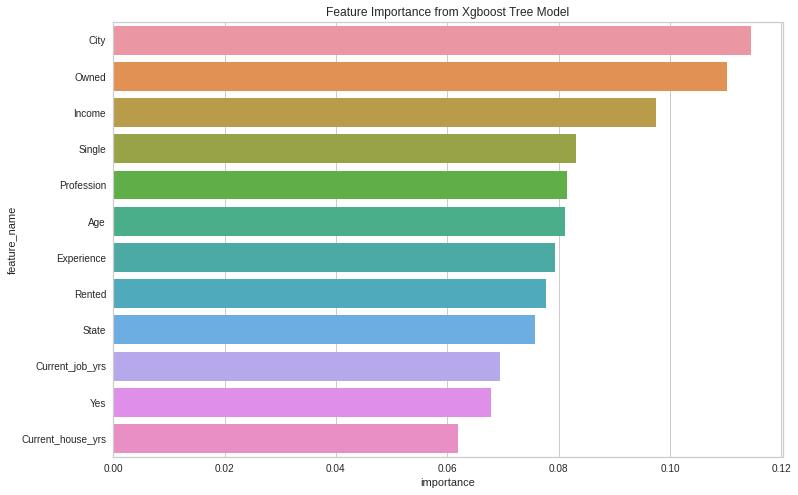

In [71]:
xgb_imp = imp_df(xgb_importance,feature_names)

plt.figure(figsize=(12,8))
sns.barplot(
    y = 'feature_name',
    x = 'importance',
    data = xgb_imp,
    orient='h',
)
plt.title('Feature Importance from Xgboost Tree Model')

**Potential Riskers:**

**note:** `City` and `Profession` are encoded with weight we conclude before. `Owned` and `Rented` is the state of customers' housing condition. `Yes` is the flag whether a customer owns a car.

Based on the feature importance we get above, we will discuss following factors in the next part:

- Geographical factors： `City`, `State`
- Property factors: `Owned`, `Income`, `Yes`, `Rented`, `Current_house_yrs`, `Current_job_yrs`
- Customer background: `Profession`, `Experience`, `Age`, `Single`

### Posterior Data Analysis

In [72]:
# use the balanced dataset
X_train_balc, y_train_balc = UandO_imbc_withModel(X_train, y_train, 0.2, 0.6)

**Factors： `Owned`, `Yes`, `Rented`**

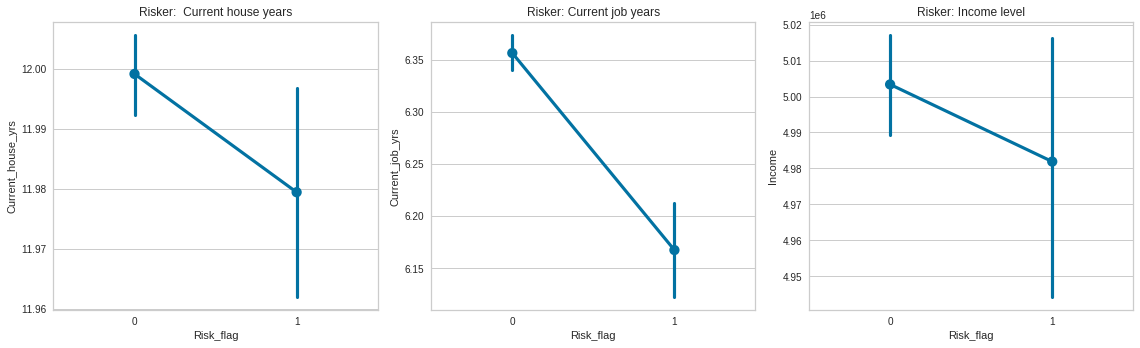

In [82]:
# explore the feature `Current_house_yrs`, `Current_job_yrs`, `Income`
fig, ax = plt.subplots(1, 3, figsize=(16,5))

sns.pointplot(y='Current_house_yrs',
       x='Risk_flag',
       data=X_train.join(y_train),
       ax=ax[0])

ax[0].set_title('Risker:  Current house years')

sns.pointplot(y='Current_job_yrs',
       x='Risk_flag',
       data=X_train.join(y_train),
       ax=ax[1])

ax[1].set_title('Risker: Current job years')

sns.pointplot(y='Income',
       x='Risk_flag',
       data=X_train.join(y_train),
       ax=ax[2])

ax[2].set_title('Risker: Income level')


fig.tight_layout()

**Observation:**
- It is unsuperising that a customer keeps his job for many years is unlikely to be at risk.
- Higher income does not enssure that someone won't be a risker, but can lower the possibility that he become one.
- Longer house keeping years decrease the chance that a customer to be a risker to some degree.

**Factors：`Owned`, `Yes`, `Single`**

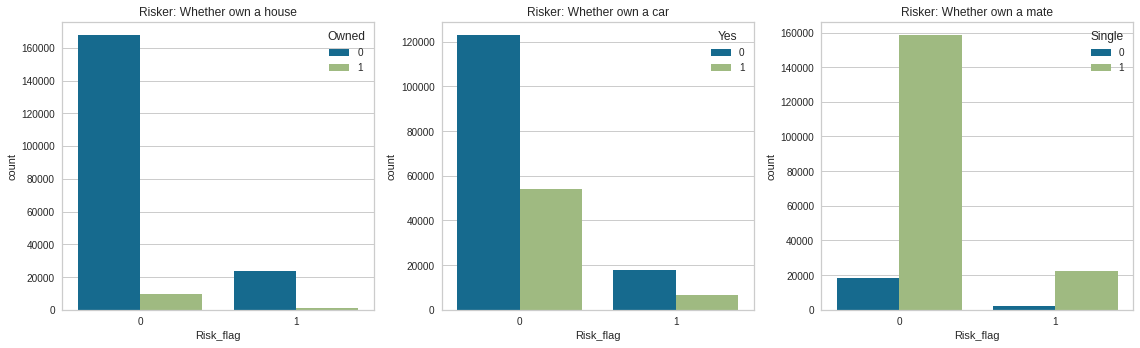

In [83]:
# explore the feature `Owned`, `Yes`, `Single`

fig, ax = plt.subplots(1, 3, figsize=(16,5))

sns.countplot(x='Risk_flag',
      hue='Owned',
      data=X_train.join(y_train),
      ax=ax[0])

ax[0].set_title('Risker: Whether own a house')

sns.countplot(x='Risk_flag',
       hue='Yes',
       data=X_train.join(y_train),
       ax=ax[1])

ax[1].set_title('Risker: Whether own a car')

sns.countplot(x='Risk_flag',
      hue='Single',
      data=X_train.join(y_train),
      ax=ax[2])

ax[2].set_title('Risker: Whether own a mate')


fig.tight_layout()

**Observation:**

- It can be seen that a house or car ownership can decrease the chance that a customer be a risker. This is also consistent with common sense, as people with certain assets have less risky liabilities.
- In addition, a single person will be more likely to be at a risk of loan. This may because two people are able to do the job of replenishing, supporting and monitoring each other's possessions and expenses, if one has a partner.

**Factor:`Age`, `Profession`, `City`**

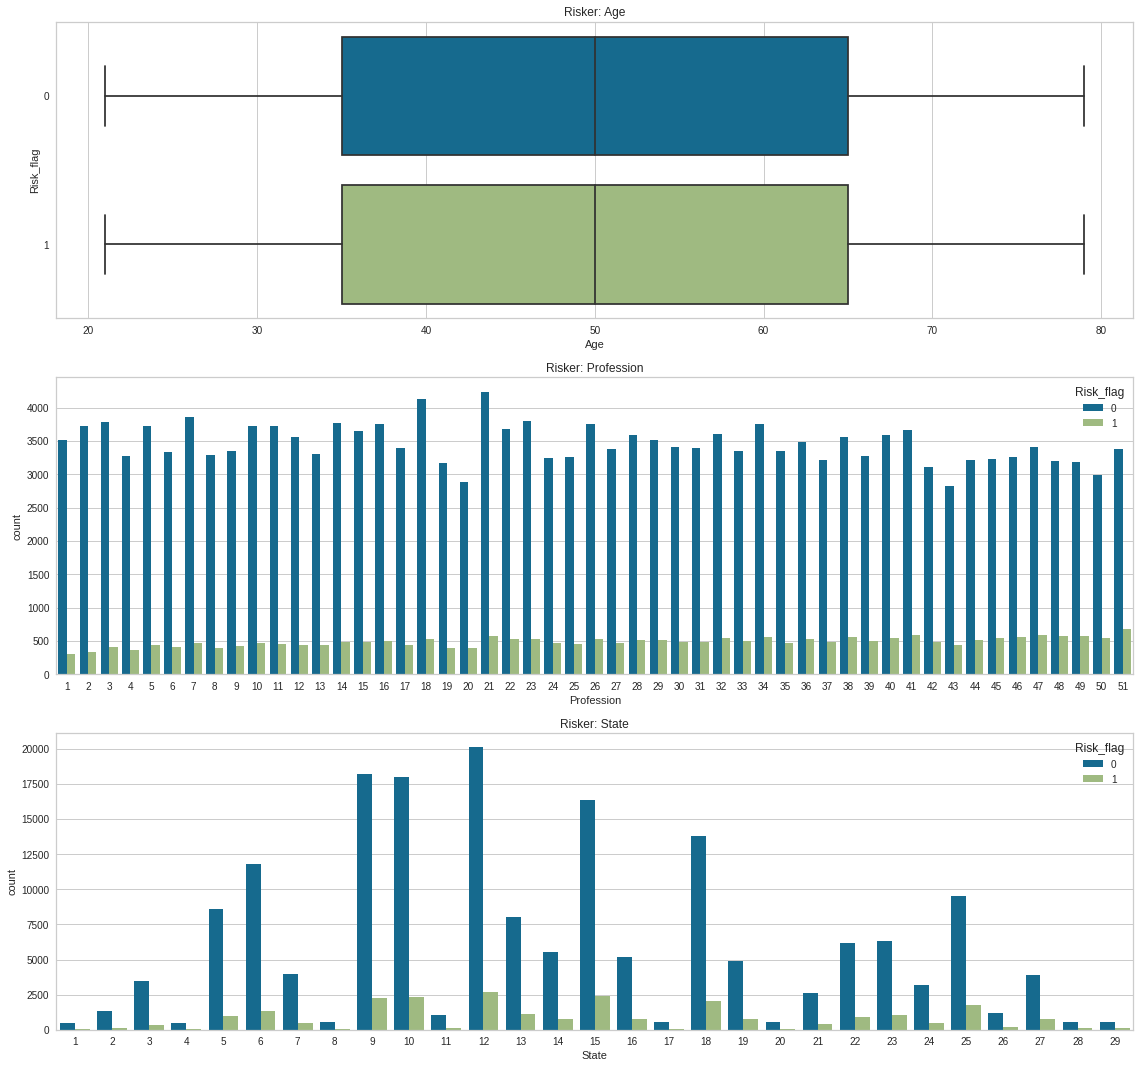

In [84]:
# explore the feature `Age`, `Profession`, `City`
fig, ax = plt.subplots(3, 1, figsize=(16,15))

sns.boxplot(y='Risk_flag',
      x='Age',
      data=combined_df,
      orient='h',
      ax=ax[0]
      )

ax[0].set_title('Risker: Age')

sns.countplot(hue='Risk_flag',
      x='Profession',
      data=X_train.join(y_train),
      ax=ax[1]
      )

ax[1].set_title('Risker: Profession')

sns.countplot(x='State',
      hue='Risk_flag',
      data=X_train.join(y_train),
      ax=ax[2])

ax[2].set_title('Risker: State')

fig.tight_layout()

**Observation:**

- We can find that age seems do not have any contribution to the risker prediction, people from any age group can be risker.
- People occupied with any profession share similar possibility to be at risk of on loan, supported by Professional Equality Theory.
- However, people from different states have different possibility to be risker. This may be caused by differences in policing and regulations as well as income and consumption levels between states.

### Bussiness Strategy

Based on the feature importance analysis and data analysis results we have got, here I will raise some bussiness strategy to help companies reduce losses caused by potential risker by identifying them as early as possible.

- City is one of the most important factors that contribute the risk. If the company has bussiness among different cities, it is a wise choice to establish various access criteria in different cities.
- However, the development of a city is not constant from time to time, companies should modify their strategy to keep pace with the general development of cities.
- Bussinessmen should not take age into consideration if they are evaluating a customer.
- In fact, younger person are more likely to be indebted from a combination of aspects, given the fact that more years of working and more years of car ownership may greatly increase the trusthiness of one's assets.
- If a single customer do not have neither a car nor a house, it is better to provide him matchmaking service because such single person has high possibilty to be indebted.
- Customer with medium or high have similar chance to be risker, but someone with too low income have high chance to be risker. Company can consider risk mitigation measures such as reducing the loan amount among such group of people.

Prediction Model Recommendation:

- Xgboost Classifier (With GPU support)
- Random Forest (Without GPU support)

# Unsupervised Learning Task

In this part, I will go through two task under unsupervised field, including dimension reduction and group clustering.

## Dimension Reduction 

In this part, I will use the following unsupervised learning technique to reduce the dataset dimension. 

- PCA
- Plain Autoencoder & Variational Autoencoder

Then I will apply the new dataset in selected classification model to check if it can improve the model performance.

### PCA

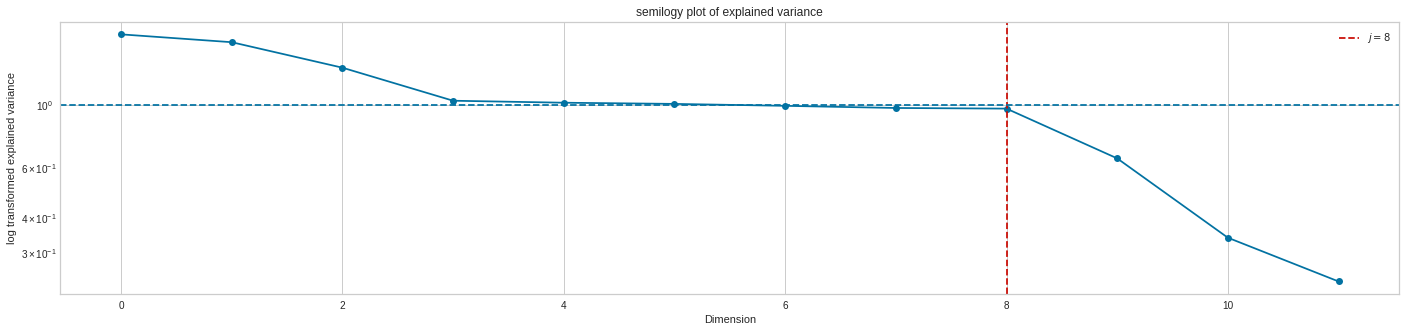

In [85]:
# normalize the data
scaler = StandardScaler().fit(X_train_balc)
X_train_norm = scaler.transform(X_train_balc)

# fit the pca model
pca = PCA()
pca.fit(X_train_norm)

#select the number of principle components
plt.figure(figsize=(24,5))
plt.semilogy(pca.explained_variance_, '-o')
plt.axvline(x=8, c='r', ls='--', label=r'$j=8$')
plt.axhline(y=1, c='b', ls='--')
plt.title('semilogy plot of explained variance')
plt.xlabel('Dimension')
plt.ylabel('log transformed explained variance')
plt.legend()

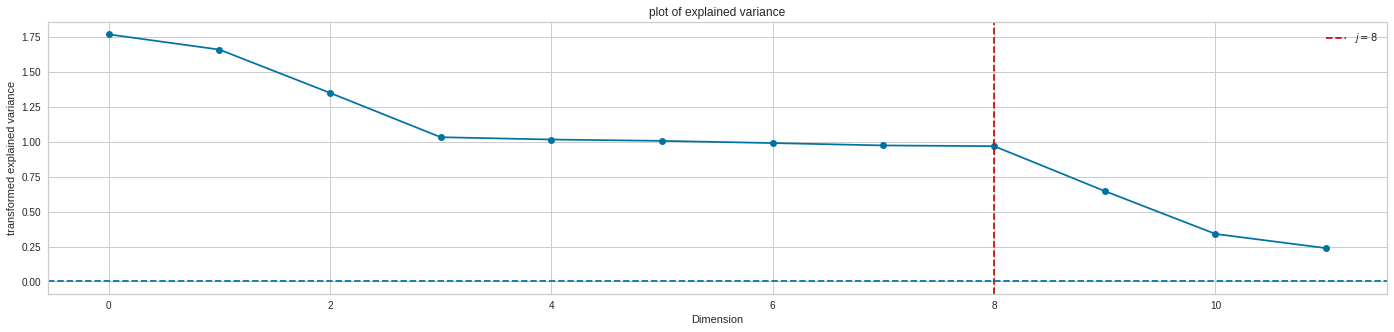

In [86]:
#select the number of principle components
plt.figure(figsize=(24,5))
plt.plot(pca.explained_variance_, '-o')
plt.axvline(x=8, c='r', ls='--', label=r'$j=8$')
plt.axhline(y=0, c='b', ls='--')
plt.title('plot of explained variance')
plt.xlabel('Dimension')
plt.ylabel('transformed explained variance')
plt.legend()

/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:789: ComplexWarning:

Casting complex values to real discards the imaginary part

/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:789: ComplexWarning:

Casting complex values to real discards the imaginary part



Text(0.5, 0, 'Contribution(%)')

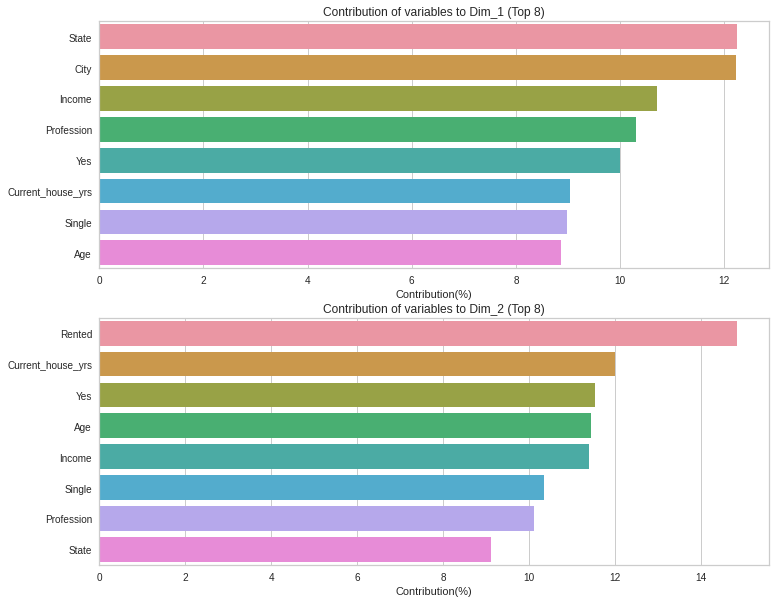

In [87]:
# fit the pca model
pca = PCA()
pca.fit(X_train_norm)

#select the first 11 of principle components according to pic above
X_train_pca = pca.transform(X_train)[:,:11]
X_test_pca = pca.transform(X_test_raw)[:,:11]

# compute the contribution for principle components
def contribution_computing(pca_comp,feature_columns):
    df = pd.DataFrame(pca_comp,columns=feature_columns)
    df = df.T
    for ind in df.columns.tolist():
        abs_ind = df[ind].apply(lambda x: x**x)
        sum_ind = sum(abs_ind.values)
        df[ind] = 100*abs_ind.values/sum_ind
    return df

# transform the components to contribution dataframe
df_contribution = contribution_computing(pca.components_,X_train.columns.tolist())

# select top-8 feture which has the most contribution for PC
demension_1 = df_contribution[0].sort_values(ascending=False)[:8]
demension_2 = df_contribution[1].sort_values(ascending=False)[:8]

# Visulize the feature contribution for the first 2 dim
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
sns.barplot(x=demension_1.values, y=demension_1.index.tolist(), orient='h', ax=ax[0])
sns.barplot(x=demension_2.values, y=demension_2.index.tolist(), orient='h', ax=ax[1])

ax[0].set_title('Contribution of variables to Dim_1 (Top 8)')
ax[1].set_title('Contribution of variables to Dim_2 (Top 8)')
ax[0].set_xlabel('Contribution(%)')
ax[1].set_xlabel('Contribution(%)')

**Observation:**

- We can see many of these features are also important in the classification task we did in the supervised learning part, which indicating such PCA is reasonable.

### Plain Auto-encoder

In [88]:
X_train_res, y_train_res = UandO_imbc_withModel(X_train, y_train, 0.2, 0.6)
std_scale = StandardScaler().fit(X_train_res)
X_train_norm = std_scale.transform(X_train_res)
X_valid_norm = std_scale.transform(X_valid)

n,m = X_train_norm.shape

# define the network structure
def encoder(x):
    x = Dense(units=300, activation='relu')(x)
    x = Dense(units=200, activation='relu')(x)
    x = Dense(units=30,activation='relu')(x)
    return x

def decoder(x):
    x = Dense(units=200,activation='relu')(x)
    x = Dense(units=300, activation='relu')(x)
    x = Dense(units=m, activation='tanh')(x)
    return x

# compile the auto-encoder and encoder
x = Input(shape=(m,))
z = encoder(x)
x_recon = decoder(z)

autoencoder = Model(inputs=x, outputs=x_recon)

autoencoder.compile(optimizer='Adam', loss='huber_loss')
encoder = Model(inputs=x,outputs=z)

callback = EarlyStopping(monitor='val_loss', patience=10,restore_best_weights=True)

# fit the autoencoder
#this part may consume quite a long time, I have stored the result in ae.h5/ae_encoder.h5 file
history2 = autoencoder.fit(
    x=X_train_norm.reshape(-1, m),
    y=X_train_norm.reshape(-1, m),
    batch_size=128,
    epochs=300,
    validation_data=(X_test_norm,X_test_norm),
    callbacks = [callback],
)


Epoch 1/300
737/737 [==============================] - 4s 5ms/step - loss: 0.0810 - val_loss: 0.0714
Epoch 2/300
737/737 [==============================] - 3s 4ms/step - loss: 0.0712 - val_loss: 0.0695
Epoch 3/300
737/737 [==============================] - 3s 4ms/step - loss: 0.0701 - val_loss: 0.0690
Epoch 4/300
737/737 [==============================] - 3s 4ms/step - loss: 0.0698 - val_loss: 0.0687
Epoch 5/300
737/737 [==============================] - 3s 4ms/step - loss: 0.0696 - val_loss: 0.0683
Epoch 6/300
737/737 [==============================] - 3s 4ms/step - loss: 0.0695 - val_loss: 0.0687
Epoch 7/300
737/737 [==============================] - 3s 4ms/step - loss: 0.0694 - val_loss: 0.0684
Epoch 8/300
737/737 [==============================] - 3s 4ms/step - loss: 0.0693 - val_loss: 0.0684
Epoch 9/300
737/737 [==============================] - 3s 4ms/step - loss: 0.0693 - val_loss: 0.0683
Epoch 10/300
737/737 [==============================] - 3s 4ms/step - loss: 0.0693 - val_lo

In [89]:
#save the auto-encoder
autoencoder.save('./trained_model/ae.h5')
encoder.save('./trained_model/a-encoder.h5')

### Variational Auto-encoder

In [90]:
# define the network structure
# def sampling(args):
#     z_mean, z_log_sigma = args
#     epsilon = K.random_normal(shape=(K.shape(z_mean)[0], 30), mean=0, stddev=0.00001)
#     return z_mean + K.exp(z_log_sigma) * epsilon * epsilon

# def vae_encoder(x):
#     x = Dense(300, activation='relu')(x)
#     x = Dense(200, activation='relu')(x)
#     z_mean = Dense(30)(x)
#     z_log_sigma = Dense(30)(x)
#     # sampling latent vector
#     z = Lambda(sampling)([z_mean, z_log_sigma])

#     return [z_mean, z_log_sigma, z]

def sampling(z_mean, z_log_sigma):
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], 30), mean=0, stddev=0.00001)
    return z_mean + K.exp(z_log_sigma) * epsilon * epsilon

def vae_encoder(x):
    x = Dense(300, activation='relu')(x)
    x = Dense(200, activation='relu')(x)
    z_mean = Dense(30)(x)
    z_log_sigma = Dense(30)(x)
    # sampling latent vector
    z = sampling(z_mean, z_log_sigma)

    return [z_mean, z_log_sigma, z]

def vae_decoder(x):
    x = Dense(200, activation='relu')(x)
    x = Dense(300, activation='relu')(x)
    x = Dense(m, activation='tanh')(x)

    return x

#encoder 
x = Input(shape=(m,))
z = vae_encoder(x)
x_recon = vae_decoder(z[2])

vae = Model(inputs=x,outputs=x_recon)
v_encoder = Model(inputs=x,outputs=z)

# vae loss construction
reconstruction_loss = losses.huber(x, x_recon) * m
kl_loss = 1 + z[1] - K.square(z[0]) - K.exp(z[1])
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

vae.compile(optimizer='adam')
callback = EarlyStopping(monitor='val_loss', patience=10,restore_best_weights=True)

# fit the variation autoencoder
#this part may consume quite a long time, I have stored the result in vae.h5/v-encoder.h5 file
history3 = vae.fit(
        x=X_train_norm.reshape(-1,m),
        y=X_train_norm.reshape(-1,m),
        epochs=300,
        batch_size=128,
        validation_data=(X_test_norm,X_test_norm),
        callbacks=[callback])

Epoch 1/300
737/737 [==============================] - 5s 5ms/step - loss: 1.1428 - val_loss: 0.9098
Epoch 2/300
737/737 [==============================] - 4s 5ms/step - loss: 0.8891 - val_loss: 0.8607
Epoch 3/300
737/737 [==============================] - 3s 5ms/step - loss: 0.8640 - val_loss: 0.8474
Epoch 4/300
737/737 [==============================] - 3s 5ms/step - loss: 0.8532 - val_loss: 0.8364
Epoch 5/300
737/737 [==============================] - 3s 5ms/step - loss: 0.8477 - val_loss: 0.8339
Epoch 6/300
737/737 [==============================] - 4s 5ms/step - loss: 0.8447 - val_loss: 0.8303
Epoch 7/300
737/737 [==============================] - 3s 5ms/step - loss: 0.8422 - val_loss: 0.8315
Epoch 8/300
737/737 [==============================] - 3s 5ms/step - loss: 0.8666 - val_loss: 0.8261
Epoch 9/300
737/737 [==============================] - 3s 5ms/step - loss: 0.8388 - val_loss: 0.8236
Epoch 10/300
737/737 [==============================] - 3s 5ms/step - loss: 0.8382 - val_lo

In [91]:
#store the model file
vae.save('./trained_model/vae.h5')
v_encoder.save('./trained_model/v-encoder.h5')

### Apply New Dataset to Xgb Classifier

**PCA**

In [92]:
xgb_test_model.fit(X_train_pca,y_train)
y_pred_pca = xgb_test_model.predict(X_test_pca)
print(classification_report(y_pred_pca,y_test_raw))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91     26558
           1       0.05      0.13      0.07      1442

    accuracy                           0.83     28000
   macro avg       0.50      0.50      0.49     28000
weighted avg       0.90      0.83      0.87     28000



**Plain Autoencoder**

In [93]:
# X_train_res, y_train_res = UandO_imbc_withModel(X_train, y_train, 0.5, 0.3)
std_scale = StandardScaler().fit(X_train)
X_train_norm = std_scale.transform(X_train)
X_valid_norm = std_scale.transform(X_valid)

# performance in the test set
combined_df = data_prepro(False)
X_columns = combined_df.columns.values.tolist()
X_columns.remove("Risk_flag")
X_test_raw = combined_df[X_columns]
y_test_raw = combined_df["Risk_flag"]

std_scale = StandardScaler().fit(X_test_raw)
X_test_norm = std_scale.transform(X_test_raw)

In [94]:
encoder = load_model('./trained_model/a-encoder.h5')
X_train_ae = encoder.predict(X_train_norm)
X_test_ae = encoder.predict(X_test_norm)
X_valid_ae = encoder.predict(X_valid_norm)

xgb_test_model.fit(X_train_ae,y_train)
y_pred_ae = xgb_test_model.predict(X_valid_ae)
print(classification_report(y_pred_ae,y_valid))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94     41604
           1       0.76      0.54      0.63      8796

    accuracy                           0.89     50400
   macro avg       0.83      0.75      0.78     50400
weighted avg       0.88      0.89      0.88     50400



**Variational Auto-encoder**

In [95]:
v_encoder = load_model('./trained_model/v-encoder.h5')
X_train_vae = v_encoder.predict(X_train_norm)
X_test_vae = v_encoder.predict(X_test_norm)
X_valid_ae = v_encoder.predict(X_valid_norm)

xgb_test_model.fit(X_train_vae[2],y_train)
y_pred_vae = xgb_test_model.predict(X_valid_ae[2])
print(classification_report(y_pred_vae,y_valid))
# print(classification_report(y_pred_vae,y_test_raw))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     41568
           1       0.77      0.54      0.64      8832

    accuracy                           0.89     50400
   macro avg       0.84      0.75      0.79     50400
weighted avg       0.88      0.89      0.88     50400



**note:**
I tried to use `Lambda(sampling)([z_mean, z_log_sigma])` to define the encoding funtion in VAE. However, I found that it will cause an error says `SystemError: unknown opcode` if I compile this model in Python higher than 3.5. Hence, I used the formula function above to replace it to avoid this potential error in different environments.

Said by [Lambda layer](!https://keras.io/api/layers/core_layers/lambda/)
> WARNING: tf.keras.layers.Lambda layers have (de)serialization limitations!
> The main reason to subclass tf.keras.layers.Layer instead of using a Lambda layer is saving and inspecting a Model. Lambda layers are saved by serializing the Python bytecode, which is fundamentally non-portable. They should only be loaded in the same environment where they were saved. 
> Subclassed layers can be saved in a more portable way by overriding their get_config method. Models that rely on subclassed Layers are also often easier to visualize and reason about.

### Conclusion

- After reduce the feature dimensionaty from 11 to 8, the classification model can fit and score the dataset much faster.
- The feature exctration make the model accuracy decrease, especially the PCA  (89%-before & 82%-after), while the autoencoder decrease slightly (89%-before & 88%-after).

## Group Clustering

### K-means Clustering 

In [100]:
cus_df = data_prepro(True)
cus_df = cus_df.drop(labels=['Profession', 'Age','City','Risk_flag'], axis=1)
# outlier hanlding
clf = LocalOutlierFactor()
ind = clf.fit_predict(cus_df)

cus_df['dec_ind'] = ind
cus_df = cus_df[cus_df['dec_ind']==1]
cus_df = cus_df.drop(columns=['dec_ind'])

Here I use `elbow` method to select appropriate cluster number `K`

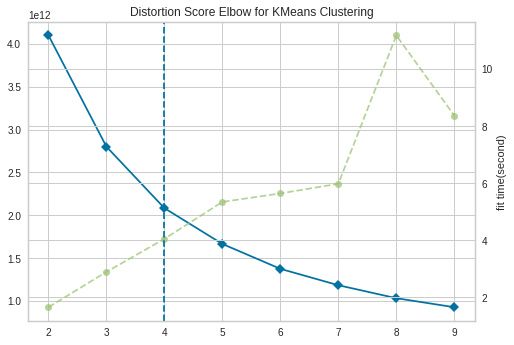

In [101]:
kmean_model = KMeans(random_state=42)
visualizer_1 = KElbowVisualizer(kmean_model, k=(2,10))
visualizer_1.fit(cus_df)
plt.axvline(x=4, c='b', ls='--')
plt.ylabel('fit time(second)')
plt.title('Distortion Score Elbow for KMeans Clustering')
plt.show()

Then visulize the 4 inter-cluster distance map in 2D plane

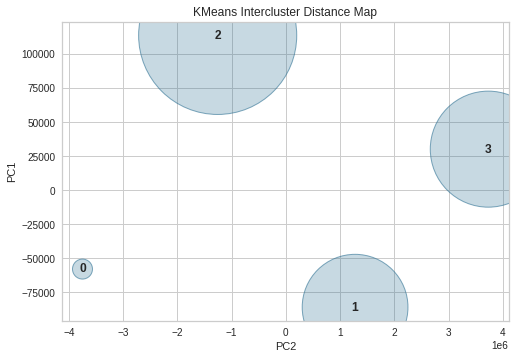

In [102]:
kmean_model_1 = KMeans(4,random_state=42)
visualizer_2 = InterclusterDistance(kmean_model_1)

visualizer_2.fit(cus_df)     
plt.ylabel('PC1')
plt.xlabel('PC2')
plt.title('KMeans Intercluster Distance Map')
plt.show()

Then visulize the sihouette score of all sample in the 4 clusters

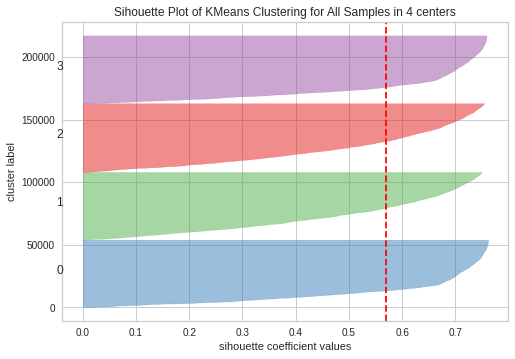

In [103]:
visualizer_3 = SilhouetteVisualizer(kmean_model_1, colors='yellowbrick')

visualizer_3.fit(cus_df) 

plt.ylabel('cluster label')
plt.xlabel('sihouette coefficient values')
plt.title('Sihouette Plot of KMeans Clustering for All Samples in 4 centers')
plt.show()

### Customer Group Analysis

We first add the clustering result into dataset.

In [104]:
cus_pred = kmean_model_1.predict(cus_df)
cus_df['cus_pred'] = cus_pred
# cus_df = cus_df.drop(columns = ['customer_type'])

Then plot the parallel coordinates to analysis the customer group according to clustering result

In [106]:
fig = px.parallel_coordinates(cus_df, color="cus_pred", 
                color_continuous_scale=px.colors.diverging.Tealrose,color_continuous_midpoint=2)
fig.show()

Unfortunately, doing clustering in this dataset in this way is obviously not a good choice. Almost all customers have an even distribution of attributes, which leads to the automatic classification of the three types of users with no significant attribute differences between them. Also we can see that almost each income interval shares similar other features.